##***HR Analytics: Identifying Job Change Factors for Aspiring Data Scientists***

In [2040]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#ignore warning
import warnings
warnings.filterwarnings('ignore')

##Load Dataset of HR data
-This dataset designed to understand the factors that lead a person to leave current job for HR researches too.\
-By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

In [2041]:
df=pd.read_csv('/content/HR Analytics Job Change Data.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [2042]:
#shape of dataset
df.shape

(19158, 14)

In [2043]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


## Attribute Information

- `enrollee_id`: Unique ID for candidate
- `city`: City code
- `city_development_index`: Development index of the city (scaled)
- `gender`: Gender of candidate
- `relevant_experience`: Relevant experience of candidate
- `enrolled_university`: Type of University course enrolled if any
- `education_level`: Education level of candidate
- `major_discipline`: Education major discipline of candidate
- `experience`: Candidate's total experience in years
- `company_size`: Number of employees in current employer's company
- `company_type`: Type of current employer
- `last_new_job`: Difference in years between previous job and current job
- `training_hours`: Training hours completed
- **Target Attribute:**
  - `target`: 0 – Not looking for job change, 1 – Looking for a job change

##***Exploratory Data Analysis (EDA)***

In [2044]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [2045]:
# Basic statistics
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [2046]:
# Check for missing values
print("missing value in dataset:-")
df.isnull().sum()

missing value in dataset:-


,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


(19158, 14)


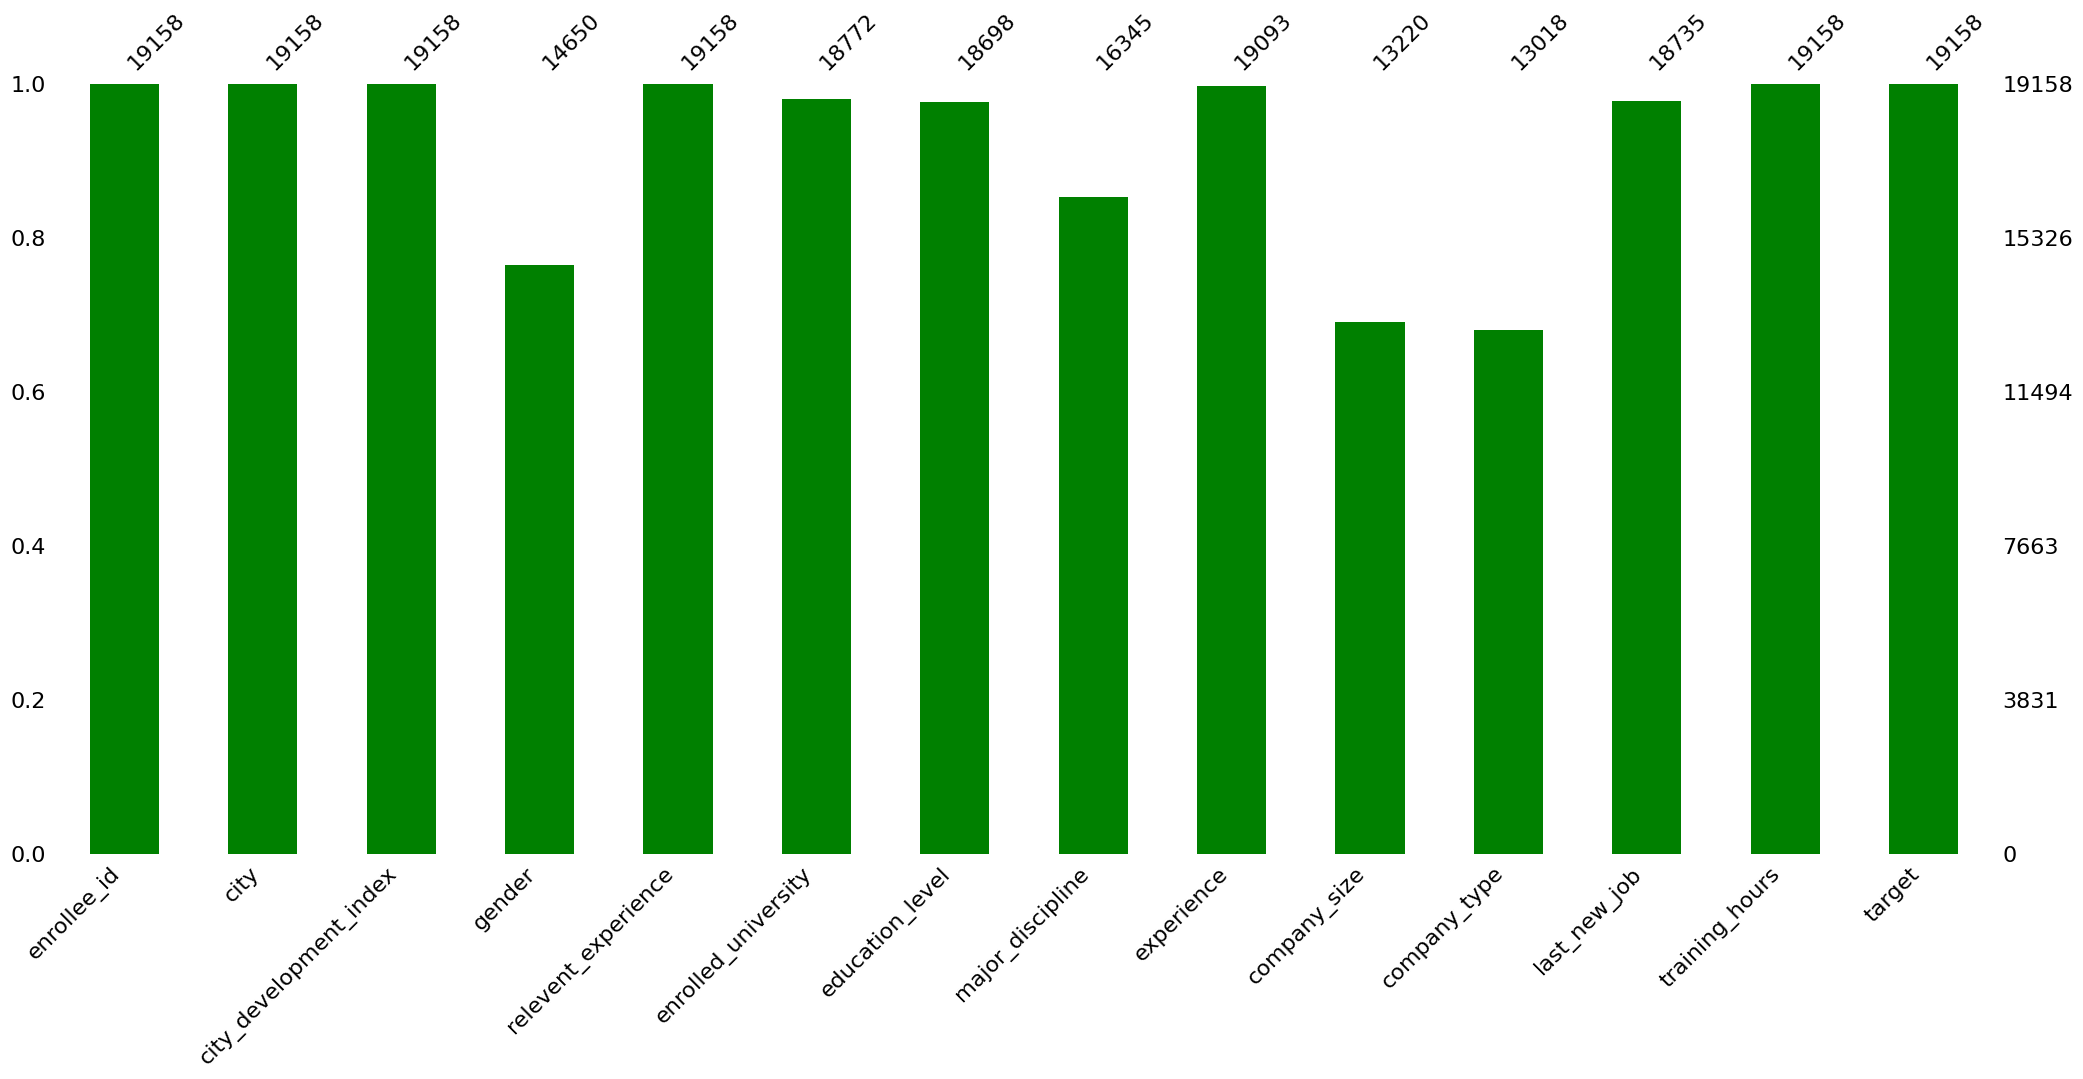

In [2047]:
#visualize the missing value in dataset as graph
import missingno as msno
print(df.shape)
#missing value bar
msno.bar(df,color='green')
plt.show()

##Treating missing values

In [2048]:
df['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [2049]:
df['gender'].value_counts()

,count
gender,
Male,13221
Female,1238
Other,191


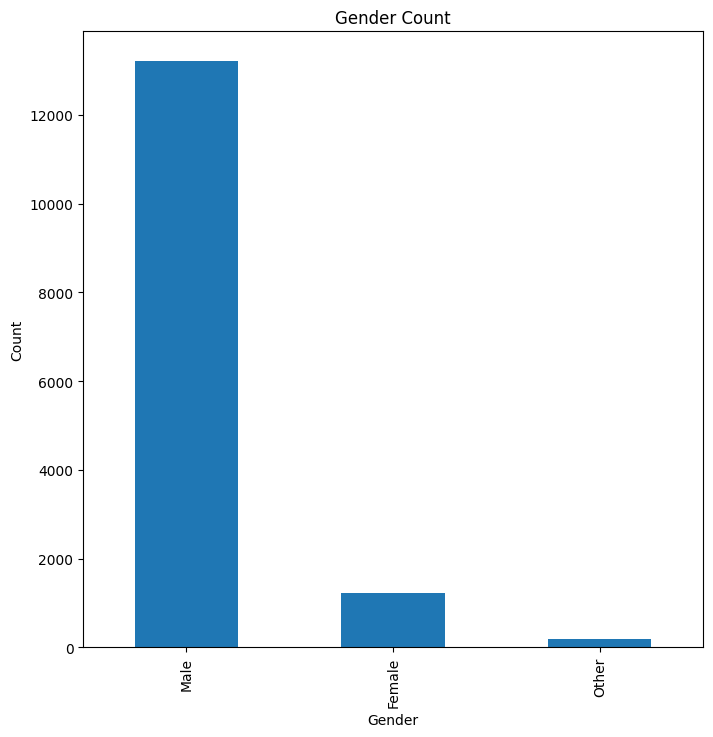

In [2050]:
#gender distibution
df.gender.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count');

In [2051]:
#treating the nan value replace by other
df['gender'].fillna('Male',inplace=True)

In [2052]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

Text(0, 0.5, 'Count')

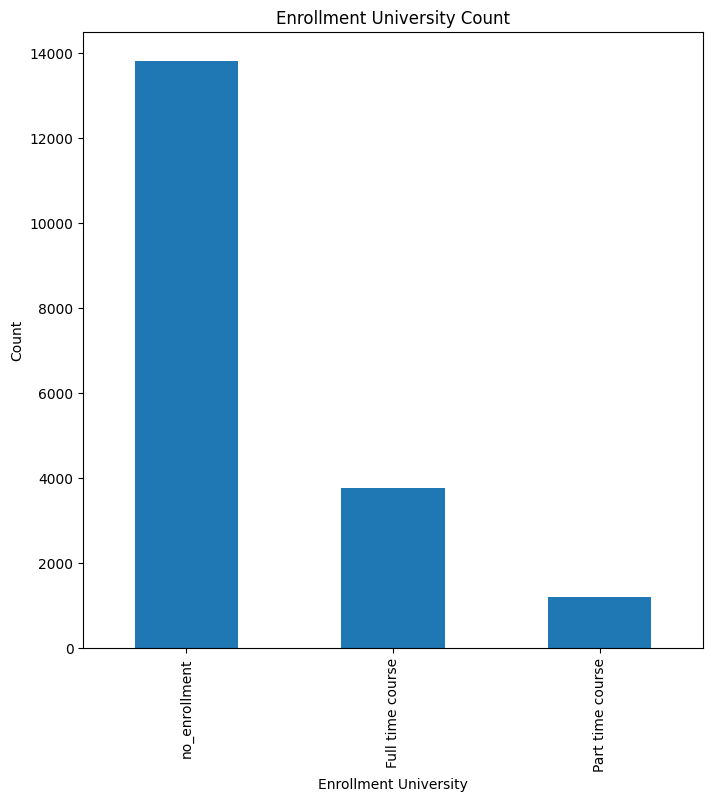

In [2053]:
#enrollment university value_counts bar plot
df['enrolled_university'].value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Enrollment University Count')
plt.xlabel('Enrollment University')
plt.ylabel('Count')

In [2054]:
#Treating the missing value in enrolled_university
df['enrolled_university'].fillna('no_enrollment',inplace=True)

In [2055]:
df['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

Text(0, 0.5, 'Count')

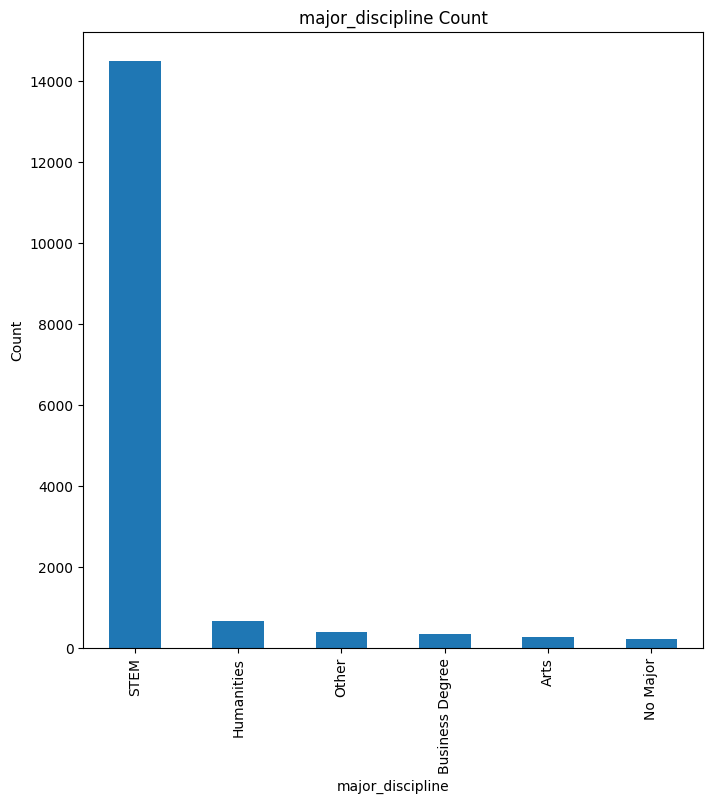

In [2056]:
#major_discipline value_counts bar plot
df['major_discipline'].value_counts().plot(kind='bar', figsize=(8,8))
plt.title('major_discipline Count')
plt.xlabel('major_discipline')
plt.ylabel('Count')

In [2057]:
#Ttreating the missing value of 'major_discipline'
df['major_discipline'].fillna('STEM',inplace=True)

In [2058]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [2059]:
#treating the missing value of Experience
df['experience'].fillna('0',inplace=True)

In [2060]:
#convert <20 to 21 and <1 to 0
df['experience'] = df['experience'].replace('<1', '0')
df['experience'] = df['experience'].replace('>20','21')

In [2061]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

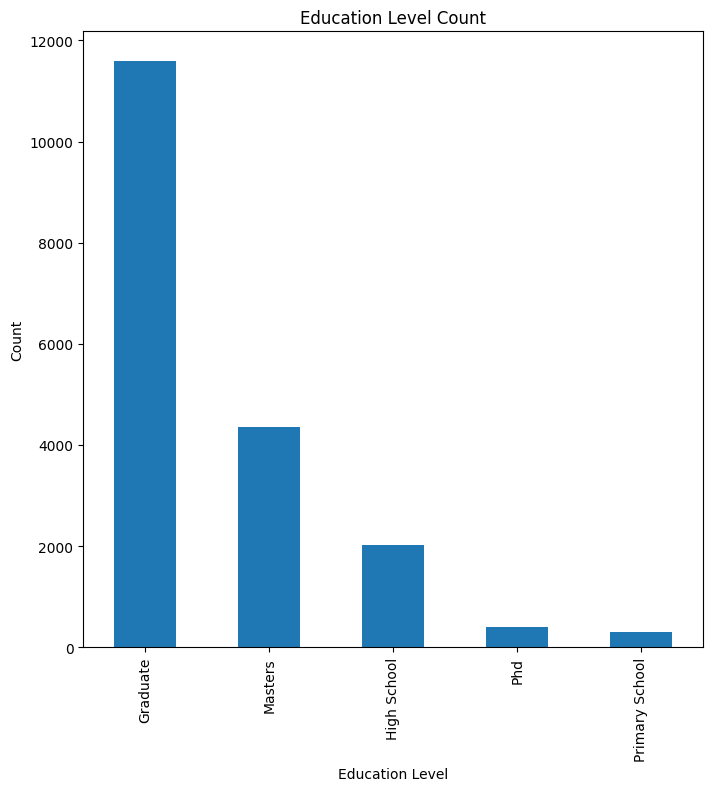

In [2062]:
#fix education level
df.education_level.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Education Level Count')
plt.xlabel('Education Level')
plt.ylabel('Count');

In [2063]:
df['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [2064]:
#treating missing value of Education level Graduate
df['education_level'].fillna('Graduate', inplace=True)

In [2065]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [2066]:
#treating the missing values in 'last_new_job'
df['last_new_job'].fillna('1', inplace=True)

In [2067]:
#convert the unsual values
df['last_new_job'] = df['last_new_job'].replace('>4', '5')
df['last_new_job'] = df['last_new_job'].replace('never', '0')

In [2068]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [2069]:
df['company_size'].value_counts()

,count
company_size,
50-99,3083
100-500,2571
10000+,2019
10/49,1471
1000-4999,1328
<10,1308
500-999,877
5000-9999,563


In [2070]:
df['company_size'].fillna('50-99', inplace=True)

In [2071]:
#convert unusual values to the common trend
df['company_size'] = df['company_size'].replace('10000+', '10000-11000')
df['company_size'] = df['company_size'].replace('10/49', '10-49')
df['company_size'] = df['company_size'].replace('<10', '1-9')

In [2072]:
df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

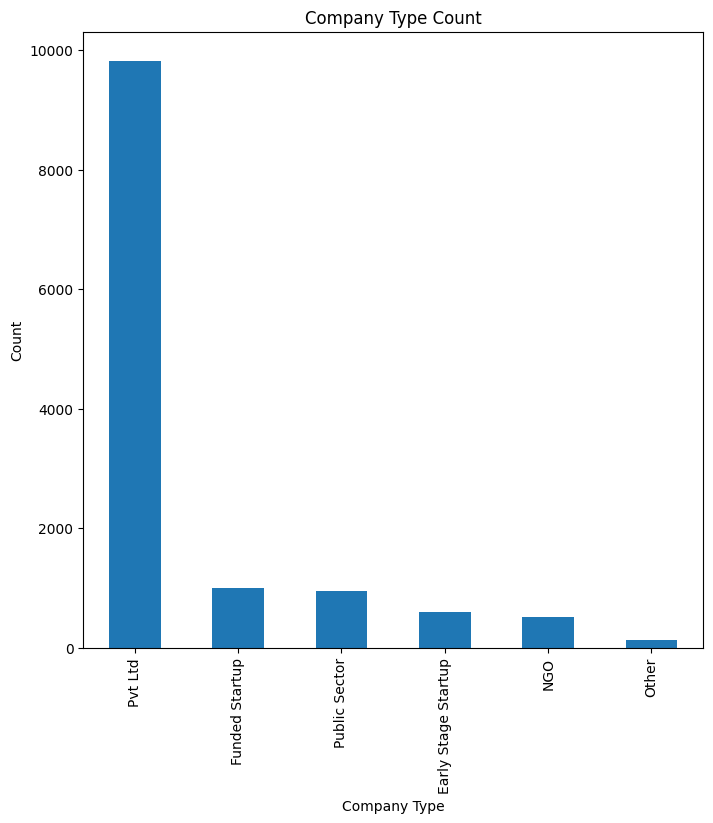

In [2073]:
#fix company type
df.company_type.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Company Type Count')
plt.xlabel('Company Type')
plt.ylabel('Count');

In [2074]:
#fill the highest value_count category
df['company_type'].fillna('Pvt Ltd', inplace=True)

In [2075]:
df['target'].unique()

array([1., 0.])

In [2076]:
#after treating the mising value check if any missing value
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,0
relevent_experience,0
enrolled_university,0
education_level,0
major_discipline,0
experience,0
company_size,0


In [2077]:
df.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object


In [2078]:
#convert interger format in form of object change in to int
df['experience'] = df['experience'].astype(int)
df['last_new_job'] = df['last_new_job'].astype(int)

In [2079]:
#check duplicate data
df.duplicated().sum()

0

In [2080]:
#check the nunique dataset
df.nunique()

,0
enrollee_id,19158
city,123
city_development_index,93
gender,3
relevent_experience,2
enrolled_university,3
education_level,5
major_discipline,6
experience,22
company_size,8


In [2081]:
#shape of dataset
df.shape

(19158, 14)

In [2082]:
df.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,int64
company_size,object


In [2083]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


In [2084]:
df['target'].value_counts()

,count
target,
0.0,14381
1.0,4777


In [2085]:
df['target'].unique()

array([1., 0.])

In [2086]:
df['target']=df['target'].astype(int)

In [2087]:
df['target'].dtypes

dtype('int64')

In [2088]:
df['target'].unique()

array([1, 0])

##SAVE THE CLEANED DATASET

In [2089]:
df.to_csv('cleaned_HR_data.csv', index=False)

In [2090]:
#convert target: 0 – Not looking for job change, 1 – Looking for a job change
df['target'] = df['target'].map({0: 'Not looking for job change', 1: 'Looking for a job change'})

##***Visualize the dataset***

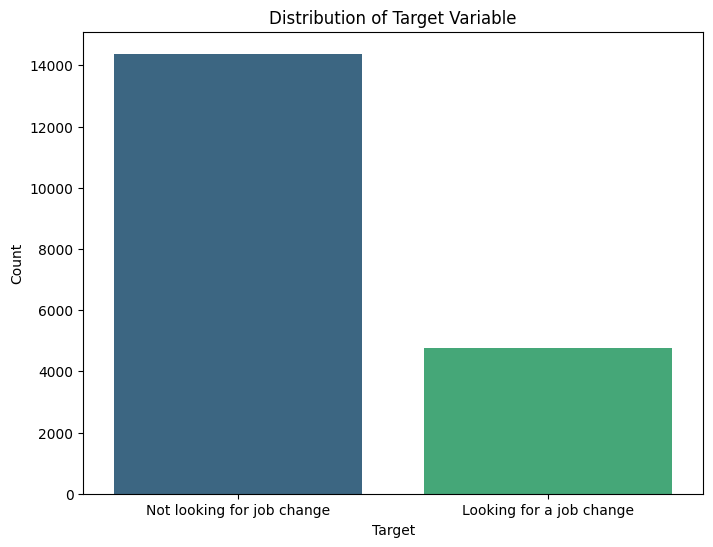

In [2091]:
# Get value counts for the target variable
target_counts = df['target'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

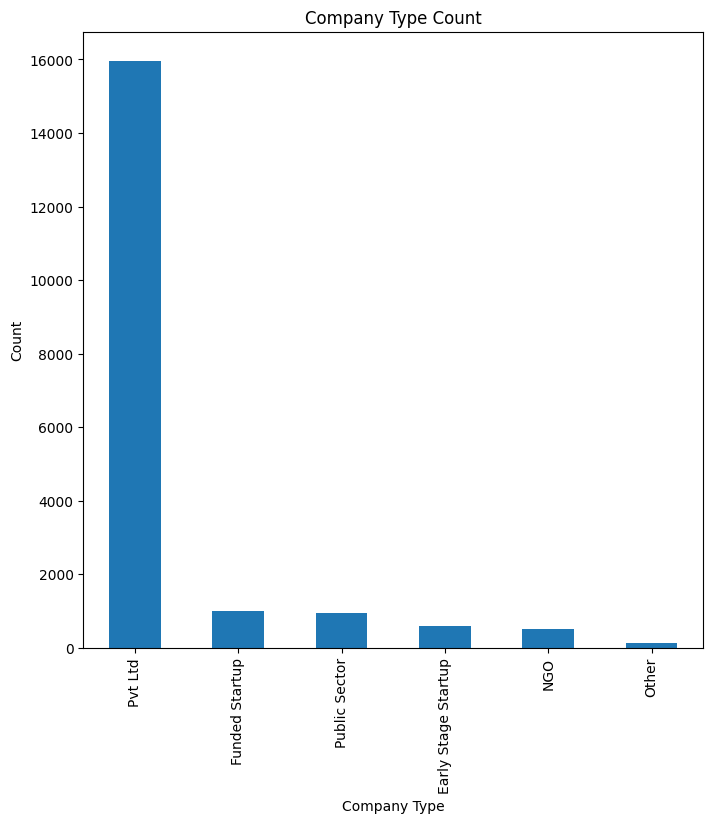

In [2092]:
#fix company type
df.company_type.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Company Type Count')
plt.xlabel('Company Type')
plt.ylabel('Count');

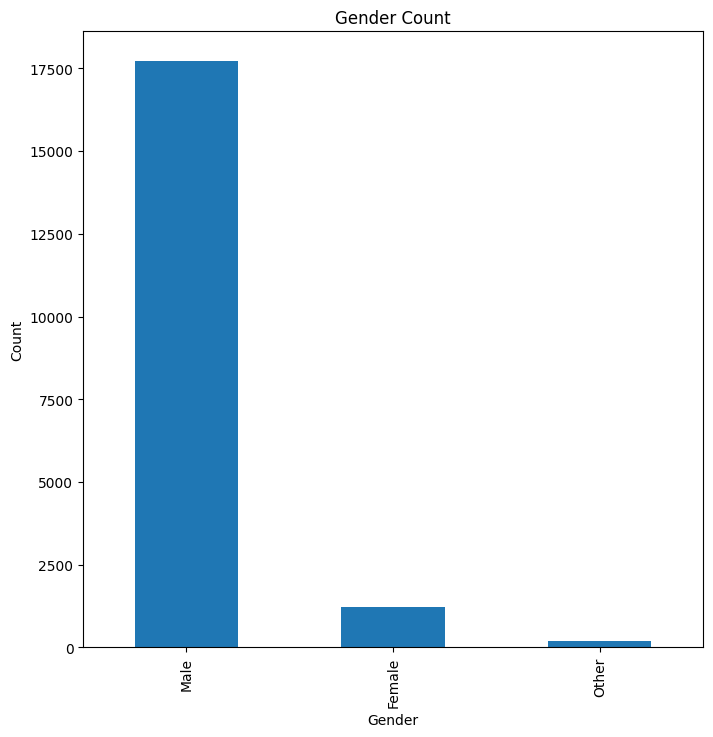

In [2093]:
#gender distribution job data
df.gender.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count');

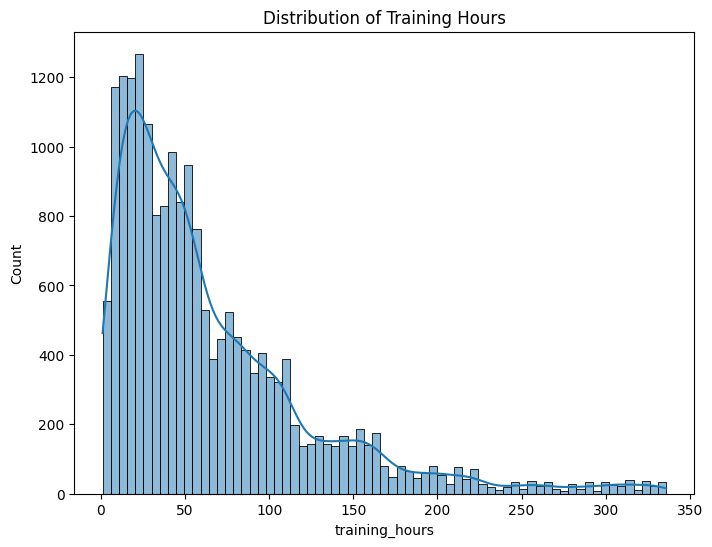

In [2094]:
# Distribution of training hours
plt.figure(figsize=(8, 6))
sns.histplot(df['training_hours'], kde=True)
plt.title('Distribution of Training Hours')
plt.show()

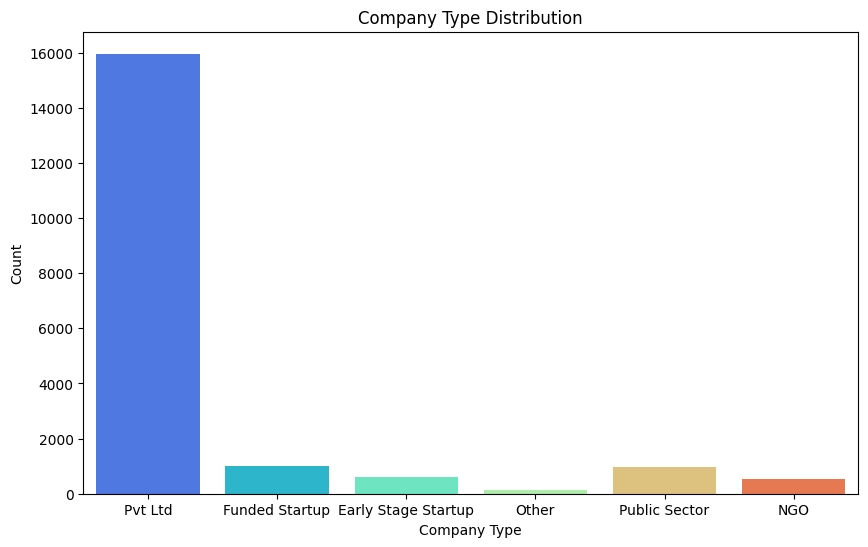

In [2095]:
#company type in barchart
plt.figure(figsize=(10, 6))
sns.countplot(x='company_type', data=df,palette='rainbow')
plt.title('Company Type Distribution')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.show()

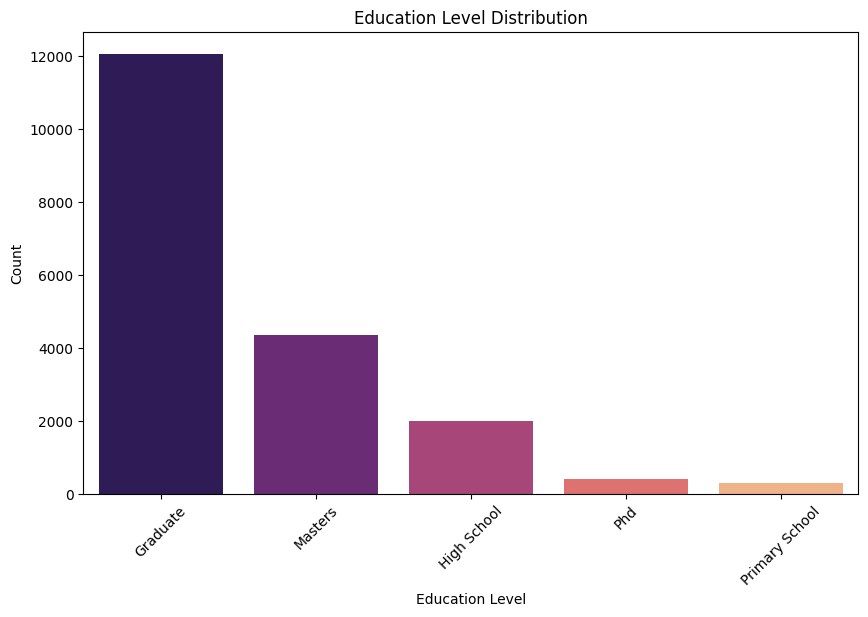

In [2096]:
# Education Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='education_level', data=df, order=df['education_level'].value_counts().index,palette='magma')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

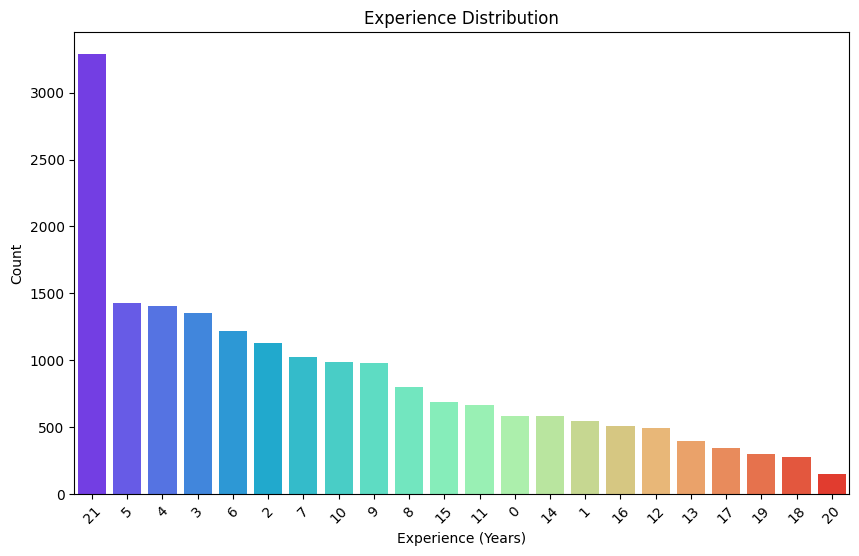

In [2097]:
# Experience Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='experience', data=df, order=df['experience'].value_counts().index,palette='rainbow')
plt.title('Experience Distribution')
plt.xlabel('Experience (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

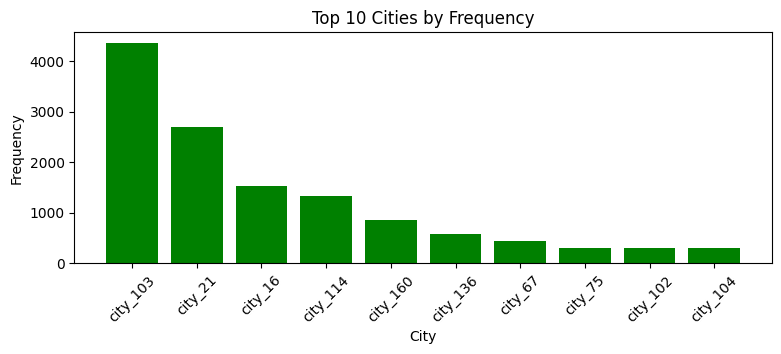

In [2098]:
# top 10 city value_count in dataset
df_city = df['city'].value_counts().head(10)
city_col = df_city.values
city_index = df_city.index

plt.figure(figsize=(9, 3))
plt.bar(city_index, city_col,color='green')
plt.xlabel("City")
plt.ylabel("Frequency")
plt.title("Top 10 Cities by Frequency")
plt.xticks(rotation=45)
plt.show()

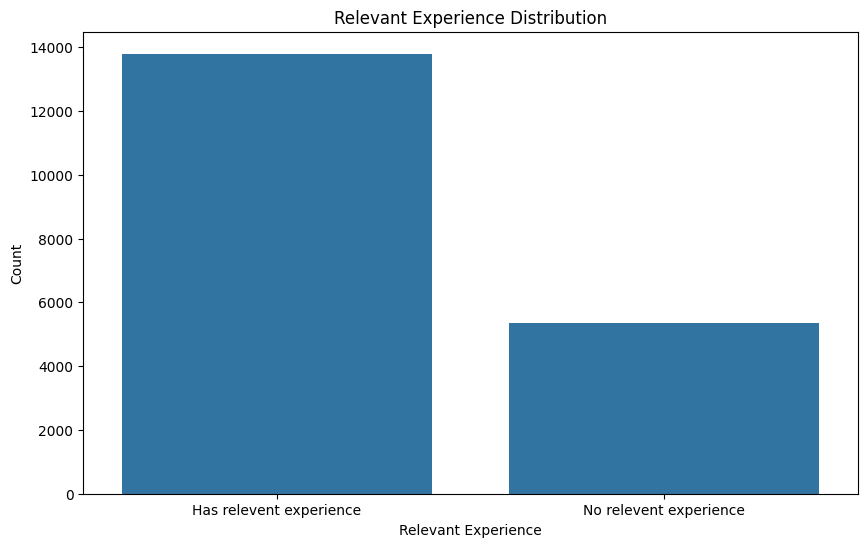

In [2099]:
#compare betwen relevent experience vs other experience
plt.figure(figsize=(10, 6))
sns.countplot(x='relevent_experience', data=df)
plt.title('Relevant Experience Distribution')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.show()


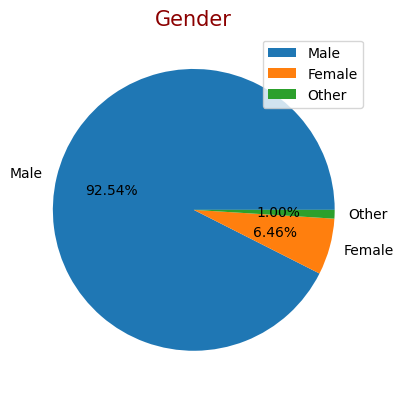

In [2100]:
#gender distribution % in dataset
gender_counts = df["gender"].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.2f%%')
plt.title('Gender',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

##***ALL Feature compare with Target(Affect hiring)***

#Does education level affect on hiriing:-

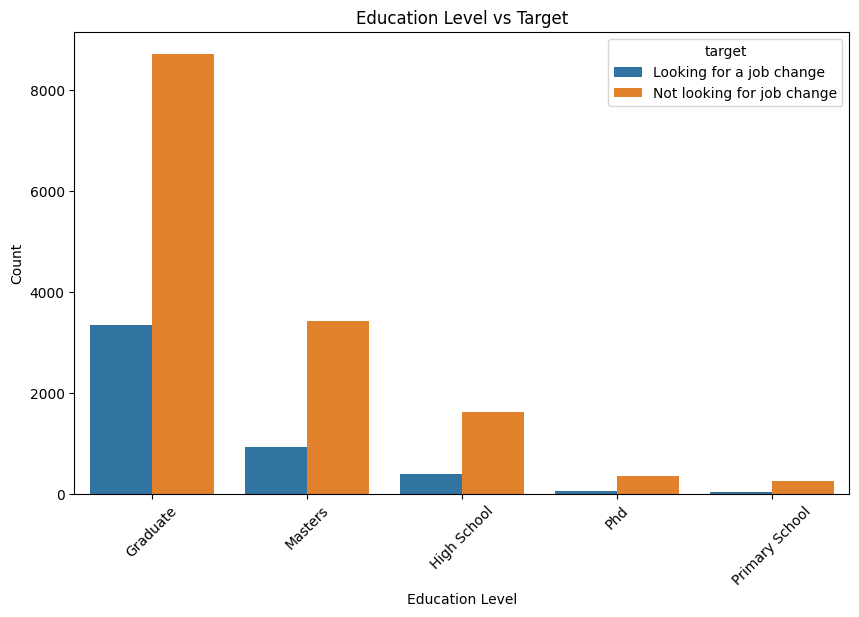

In [2101]:
# Education Level vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='education_level', hue='target', data=df, order=df['education_level'].value_counts().index)
plt.title('Education Level vs Target')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Does relevent experence and no relevent experience affect on Hiring:-

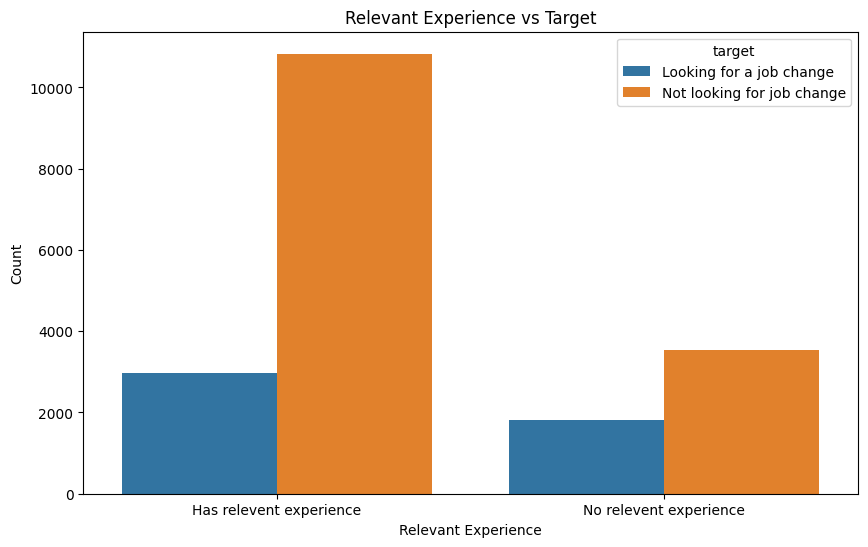

In [2102]:
# Relevant Experience vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='relevent_experience', hue='target', data=df)
plt.title('Relevant Experience vs Target')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.show()

#Does Experience year affect on hiring:-

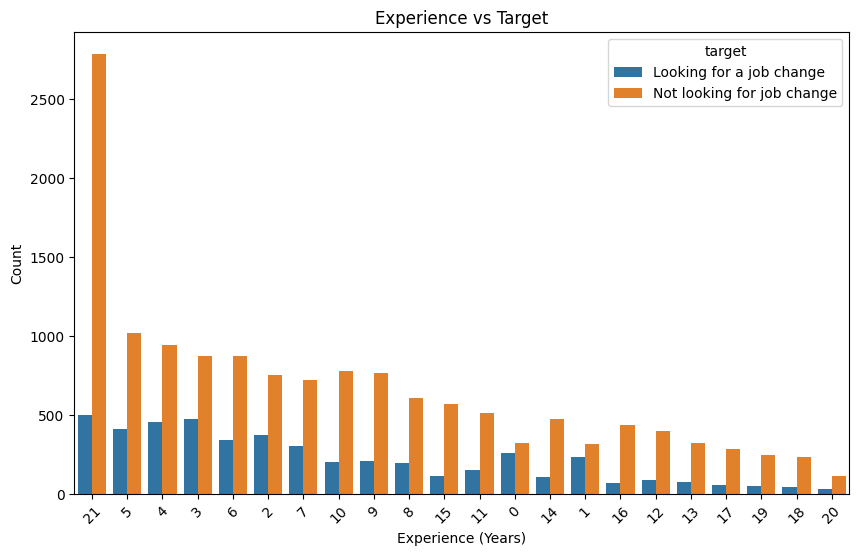

In [2103]:
# Experience vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='experience', hue='target', data=df, order=df['experience'].value_counts().index)
plt.title('Experience vs Target')
plt.xlabel('Experience (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Does company size affect on Hiring(target):-

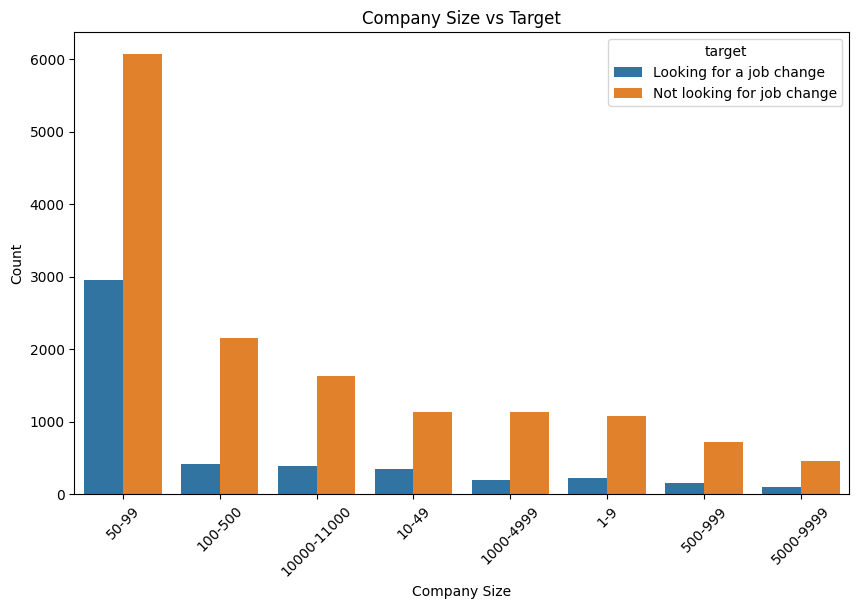

In [2104]:
# Company Size vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', hue='target', data=df, order=df['company_size'].value_counts().index)
plt.title('Company Size vs Target')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Does Major Discipline affect on Hiring(target):-

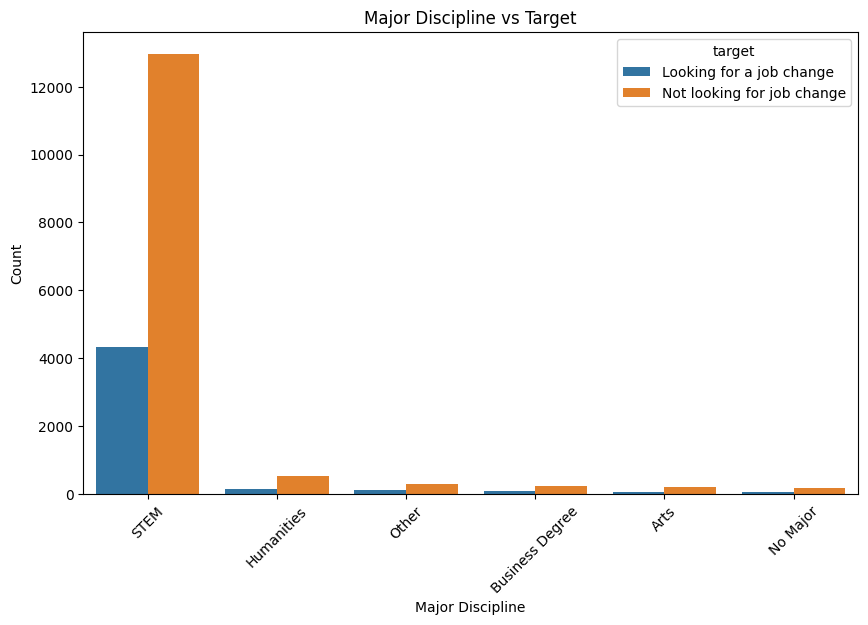

In [2105]:
# Major Discipline vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='major_discipline', hue='target', data=df, order=df['major_discipline'].value_counts().index)
plt.title('Major Discipline vs Target')
plt.xlabel('Major Discipline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

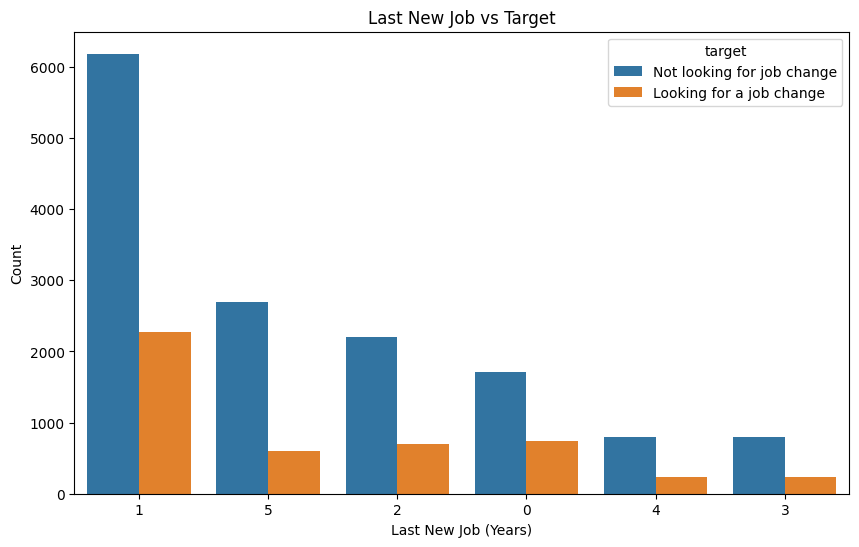

In [2106]:
# Last New Job vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='last_new_job', hue='target', data=df, order=df['last_new_job'].value_counts().index)
plt.title('Last New Job vs Target')
plt.xlabel('Last New Job (Years)')
plt.ylabel('Count')
plt.show()

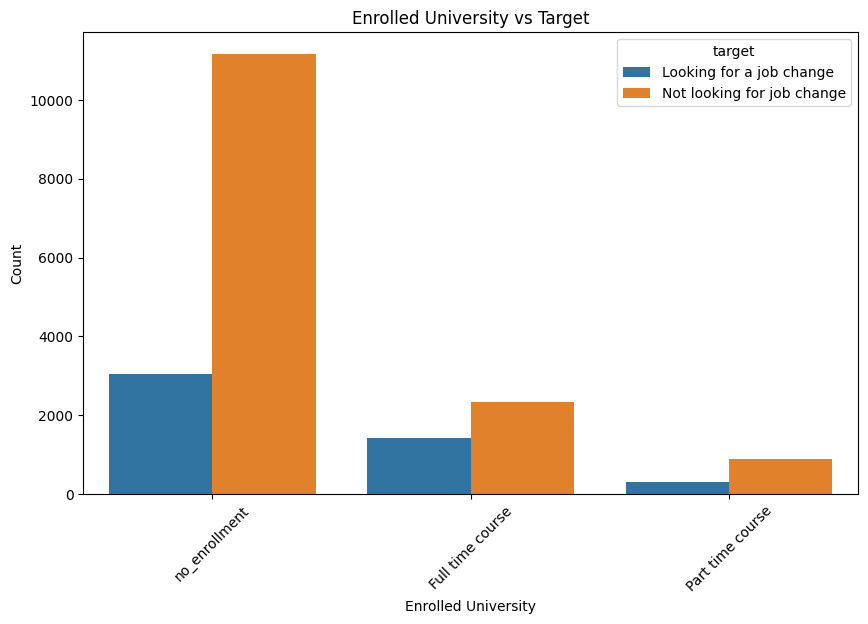

In [2107]:
# Enrolled University vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='enrolled_university', hue='target', data=df, order=df['enrolled_university'].value_counts().index)
plt.title('Enrolled University vs Target')
plt.xlabel('Enrolled University')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

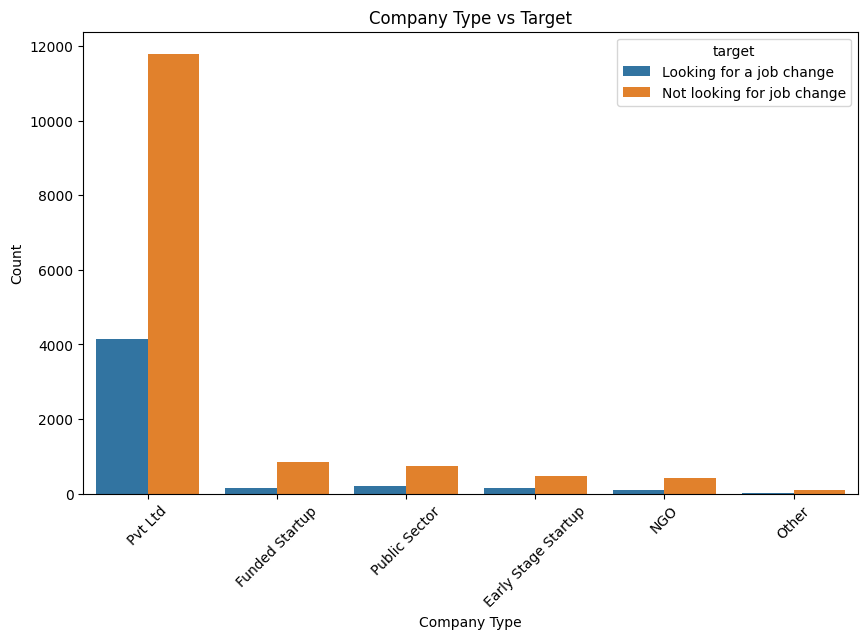

In [2108]:
# Company Type vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='company_type', hue='target', data=df, order=df['company_type'].value_counts().index)
plt.title('Company Type vs Target')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Relevent experience vs no Relevent experience hiring (target)

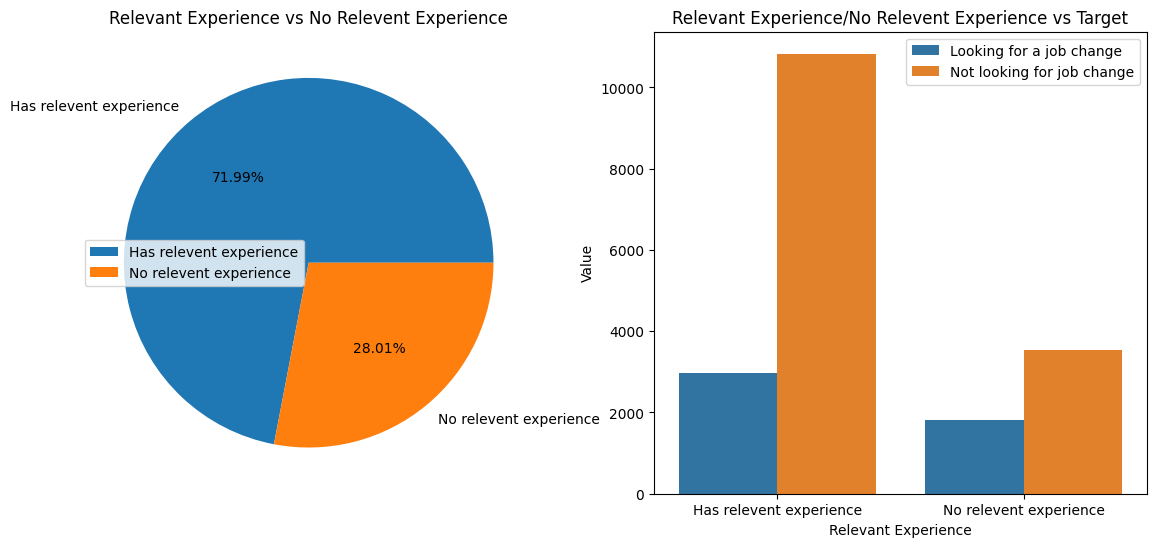

In [2109]:
#compare relevent experience vs no relevent experience hiring (target)
experience = df['relevent_experience'].value_counts()
university = df['enrolled_university'].value_counts()
plt.figure(figsize=(14, 6))

# Pie chart for relevant experience distribution
plt.subplot(1, 2, 1)
plt.pie(experience.values, labels=experience.index, autopct='%1.2f%%')
plt.title('Relevant Experience vs No Relevent Experience')
plt.legend()

# Count plot for relevant experience vs target
plt.subplot(1, 2, 2)
sns.countplot(x="relevent_experience", hue="target", data=df)
plt.xlabel('Relevant Experience')
plt.ylabel('Value')
plt.title('Relevant Experience/No Relevent Experience vs Target')
plt.legend()
plt.show()

#Does university course type Affect on hiring (target)

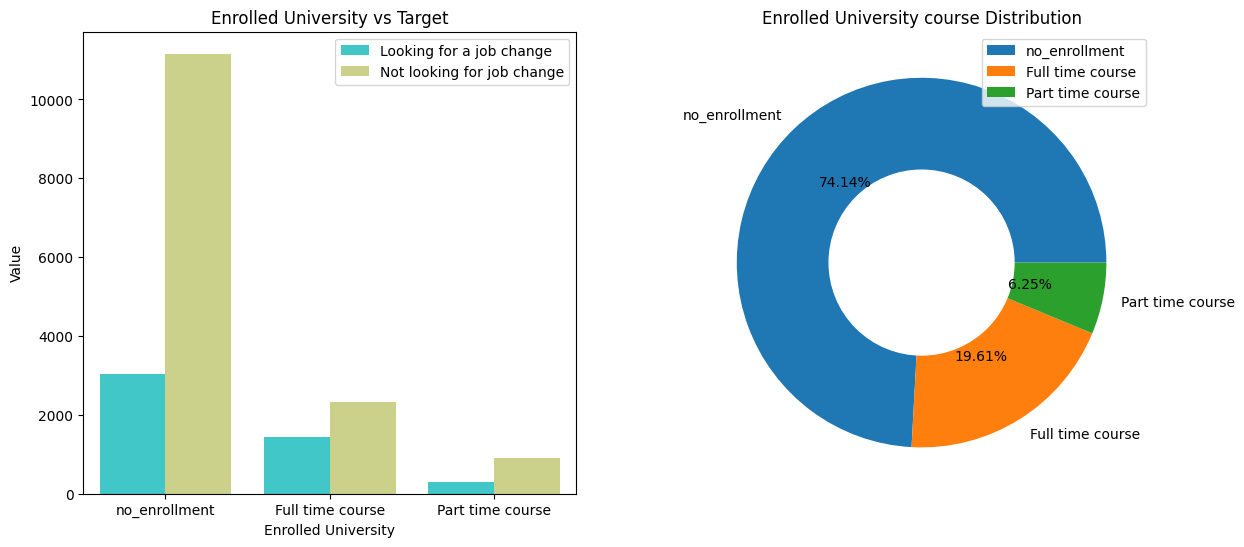

In [2110]:
#enrollment vs hiring
plt.figure(figsize=(14, 6))

# Count plot for enrolled university vs target
plt.subplot(1, 2, 1)
ax = sns.countplot(x="enrolled_university", hue="target", data=df, palette="rainbow")
plt.xlabel('Enrolled University')
plt.ylabel('Value')
plt.title('Enrolled University vs Target')
plt.legend()

# Pie chart for enrolled university distribution
plt.subplot(1, 2, 2)
circle = plt.Circle((0, 0), 0.5, color="white")
plt.pie(university.values, labels=university.index, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Enrolled University course Distribution")
plt.legend()
plt.show()

#Remove Unessary column from data that has no impotance as per visualization

In [2111]:
df.drop(['enrollee_id', 'city',], axis = 1, inplace=True)
df.shape

(19158, 12)

In [2112]:
df.sample(5)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
16286,0.910,Male,No relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,1,94,Not looking for job change
7084,0.890,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,0,36,Not looking for job change
11567,0.920,Male,No relevent experience,Full time course,Graduate,STEM,11,50-99,Pvt Ltd,1,43,Looking for a job change
11400,0.789,Male,No relevent experience,no_enrollment,High School,STEM,2,50-99,Pvt Ltd,0,98,Not looking for job change
13392,0.624,Male,Has relevent experience,Part time course,Masters,STEM,12,100-500,Public Sector,1,105,Not looking for job change


In [2113]:
# Inspect the data types
print(df.dtypes)

city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
target                     object
dtype: object


##converting the categorical column to numerical column

In [2114]:
#check the categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'target'],
      dtype='object')


In [2115]:
# Label Encoding for binary categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
df['education_level'] = le.fit_transform(df['education_level'])
df['major_discipline'] = le.fit_transform(df['major_discipline'])
df['company_size'] = le.fit_transform(df['company_size'])
df['company_type'] = le.fit_transform(df['company_type'])

In [2116]:
df['target'] = le.fit_transform(df['target'])

In [2117]:
#check if any categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index([], dtype='object')


##Data Correlation Plot

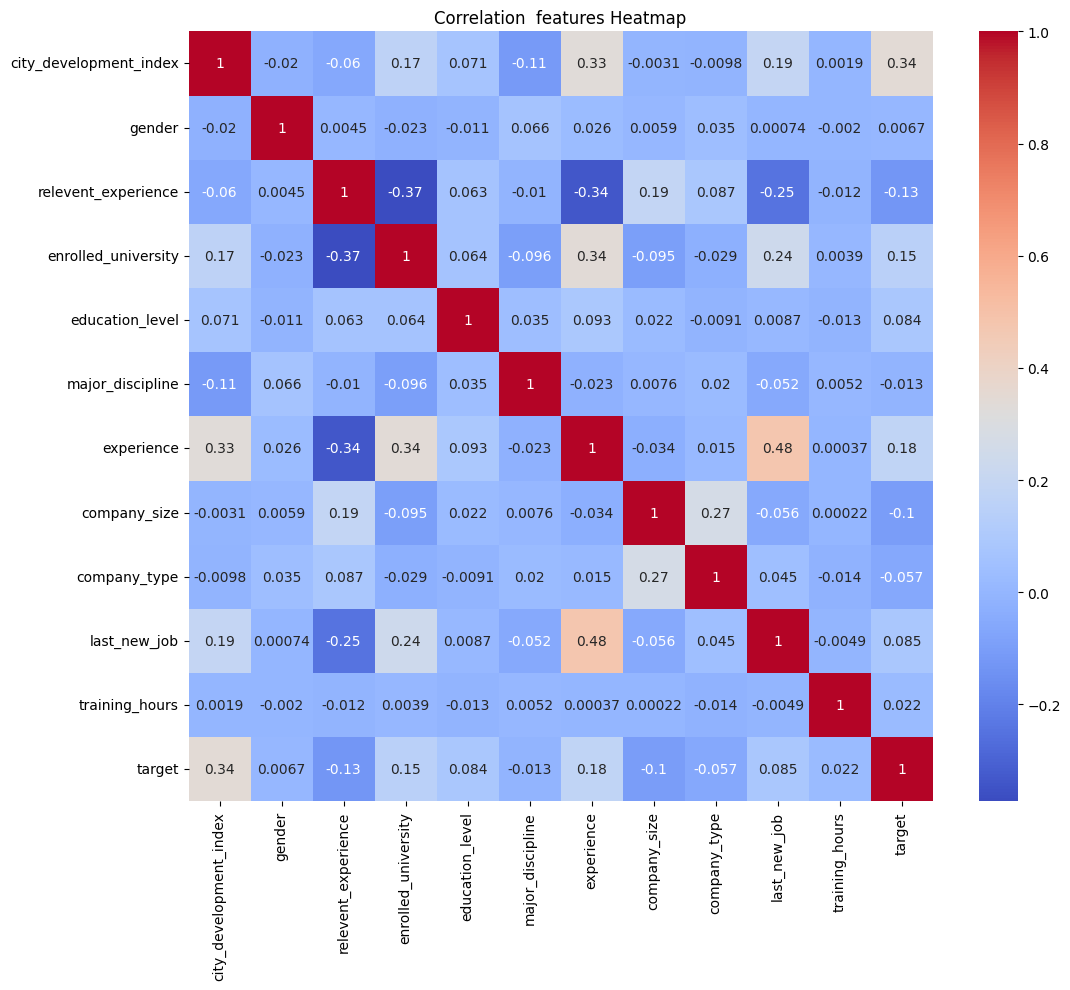

In [2118]:
#corrrelation amoung the feature
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation  features Heatmap')
plt.show()

In [2119]:
df.corr()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
city_development_index,1.000000,-0.019808,-0.059808,0.165555,0.070530,-0.114620,0.334238,-0.003127,-0.009773,0.191410,0.001920,0.341665
gender,-0.019808,1.000000,0.004455,-0.022702,-0.011144,0.066154,0.026484,0.005874,0.035429,0.000741,-0.002013,0.006733
relevent_experience,-0.059808,0.004455,1.000000,-0.372919,0.062577,-0.009968,-0.338764,0.188722,0.087295,-0.247496,-0.011566,-0.128430
enrolled_university,0.165555,-0.022702,-0.372919,1.000000,0.064493,-0.096442,0.336866,-0.094507,-0.028769,0.237087,0.003943,0.149539
education_level,0.070530,-0.011144,0.062577,0.064493,1.000000,0.034784,0.093068,0.022110,-0.009115,0.008671,-0.013175,0.083908
major_discipline,-0.114620,0.066154,-0.009968,-0.096442,0.034784,1.000000,-0.022930,0.007573,0.020189,-0.051711,0.005165,-0.013223
experience,0.334238,0.026484,-0.338764,0.336866,0.093068,-0.022930,1.000000,-0.034075,0.014799,0.477798,0.000369,0.176898
company_size,-0.003127,0.005874,0.188722,-0.094507,0.022110,0.007573,-0.034075,1.000000,0.265426,-0.056469,0.000216,-0.101212
company_type,-0.009773,0.035429,0.087295,-0.028769,-0.009115,0.020189,0.014799,0.265426,1.000000,0.045077,-0.013776,-0.056685
last_new_job,0.191410,0.000741,-0.247496,0.237087,0.008671,-0.051711,0.477798,-0.056469,0.045077,1.000000,-0.004949,0.084607


#Important Feature With respect to Target

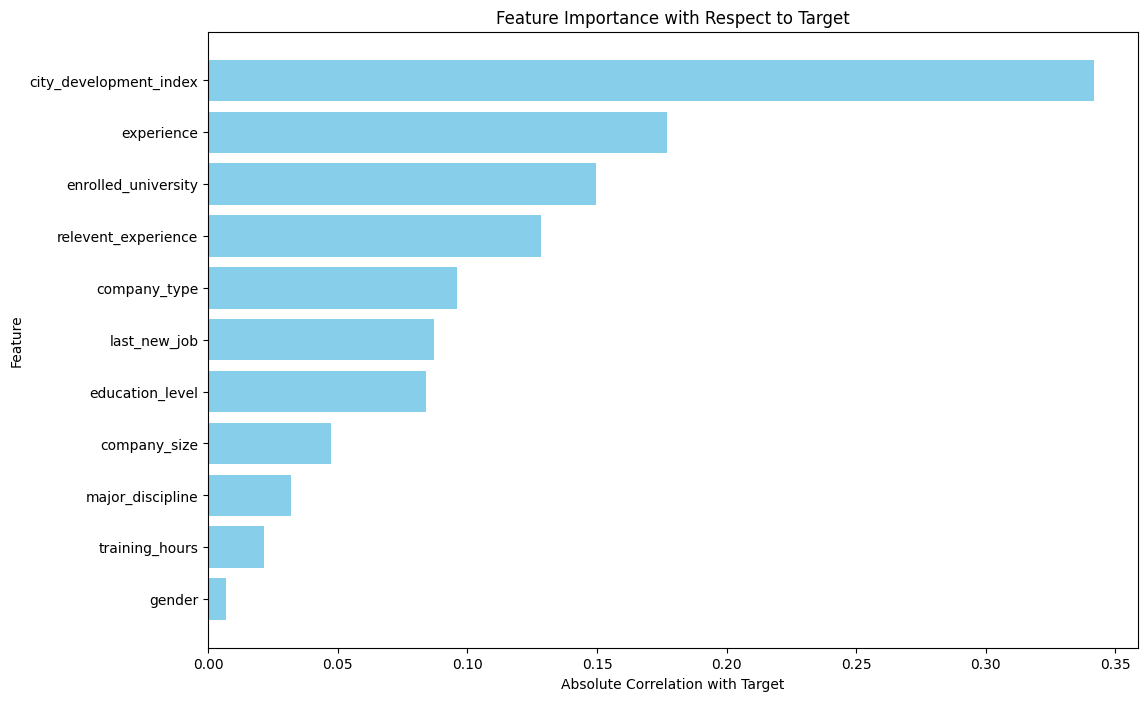

In [2120]:
# Create a dictionary of features and their correlation with the target
feature_correlations = {
    'city_development_index': -0.341665,
    'gender': -0.006733,
    'relevent_experience': 0.128430,
    'enrolled_university': -0.149539,
    'education_level': -0.083908,
    'major_discipline': 0.031823,
    'experience': -0.176898,
    'company_size': 0.047362,
    'company_type': -0.096015,
    'last_new_job': -0.087113,
    'training_hours': -0.021577
}

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame(list(feature_correlations.items()), columns=['Feature', 'Correlation'])

# Add a column with absolute correlation values
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()

# Sort the DataFrame by absolute correlation values
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(correlation_df['Feature'], correlation_df['Abs_Correlation'], color='skyblue')
plt.xlabel('Absolute Correlation with Target')
plt.ylabel('Feature')
plt.title('Feature Importance with Respect to Target')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()